# Import
Import of some basic libraries for work. Some of the inputs you can find futher in this file.

In [42]:
#import aerosandbox as asb
#import aerosandbox.numpy as np
#import neuralfoil as nf
# from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

# Step 1: Take off mass

First of all we must define the characteristics that we want for the future UAV. In this field we can use "House of quality" by ... [1]. With help of this method, we can identify the most necessary parameters for the future design.

**Add some information about house of quality and "build" it.** Create parametric research and link this to house of quality. Show how important define all parametrs befor design (or this is first step of design)

[1] Akao, Y. (1990). Quality Function Deployment: Integrating Customer Requirements into Product Design.

In [ ]:
g = 9.81 

eng_q = 2 # Number of engines
con_cell_num = 6 # Number of cells in series in one battery string
cell_U = 4.2 # Nominal cell voltage, V
prop_D = 22 # Propeller diameter, inches

LD_ratio_cruise = 14 # Cruise lift-to-drag ratio (L/D)
prop_efficiency = 0.75 # Propeller efficiency η_p
battery_specific_energy = 216 # Battery specific energy, Wh/kg
payload_mass = 1.5 # Payload mass, kg
flight_time = 90 # Required flight time, minutes
flight_time_hr = flight_time / 60 # Required flight time, hours
cruise_speed = 90 # Cruise speed, km/h
cruise_speed_ms = cruise_speed / 3.6 # Cruise speed, m/s
takeoff_mass_reserve = 1.07 # Take-off mass margin factor
battery_mass_reserve = 1.1 # Battery mass margin factor
k = 0.3 # Empirical coefficient for propeller mass formula
n = 2.3 # Empirical exponent for propeller mass formula
prop_fasteners = 0.015 # Additional mass of propeller fasteners per powerplant
e = 0.78 # Oswald efficiency factor


## Zero approximation of takeoff mass
A very rough statistical estimate based only on payload mass [2]:

$$
m_{0}=5.147m_{пн}^{0.849}
$$

[2] Gudmundsson, S. (2013). General Aviation Aircraft Design.

In [ ]:
zero_apr_mass = 5.147 * (payload_mass ** 0.849)
zero_apr_weight = zero_apr_mass * g
print("Zero approximation of takeoff mass:", zero_apr_mass)
print("Zero approximation of takeoff weight:", zero_apr_weight)

7.26199001085213
71.2401220064594


## First approximation of takeoff mass
Fisrt approximation of takeoff mass calculation need more parametrs, than just payload mass.
Structure mass can be calculated []:
$$\frac{m_{str}}{m_{0}}=0.3$$
**Where**:
- $m_{str}$ - Aircraft structural mass
- $m_{0}$ - Zero approximation mass

Required power []:
$$P_{req}=\frac{m_{0} \cdot g \cdot V}{\frac{L}{D} \cdot n_{prop}}$$
**Where**:
- $P_{req}$ - Total required engine power, W
- $V$ - Cruise speed, m/s
- $\frac{L}{D}$ - Aerodynamic quality (lift-to-drag ratio)
- $n_{prop}$ - Propeller efficiency

Engine mass []:
$$m_{eng}=0.889P_{max}^{-0.288}U_{max}^{0.1588}$$
**Where**:
- $m_{eng}$ - Engine mass, kg
- $P_{max}$ - max continuous power of one motor, W
- $U_{max}$ - Maximum battery voltage, V

Propeller mass []:
$$m_{prop}=k \cdot D^{n}$$
**Where**:
- $m_{prop}$ - Propeller mass
- $D$ - Propeller diameter, inches

Battery mass []:
$$m_{bat}=\frac{E_{req}}{p_{bat}}=\frac{P_{req} \cdot t_{flight}}{p_{bat}}$$
**Where**:
- $m_{bat}$ - Battery mass
- $E_{req}$ - 
- $p_{bat}$ - Battery specific energy, Wh/kg
- $t_{flight}$ - Time of flight

First approximation takeoff mass []:
$$m_{0}^{(i+1)}=m_{str}^{(i)}+m_{eng}^{(i)}+m_{bat}^{(i)}+m_{payload}+m_{eq}$$
**Where**:
- $m_{0}^{(i+1)}$ - First approximation UAV mass

The difference between the zeroth and first approximation []:
$$e=\frac{m_{0}^{(i+1)}-m_{0}^{(i)}}{m_{0}^{(i+1)}} \cdot 100%$$


In [45]:
equipment_mass = 0.46
stat_structure_mass = zero_apr_mass * 0.3
req_power = zero_apr_weight * cruise_speed / LD_ratio_cruise / prop_efficiency
one_eng_power = req_power / eng_q
eng_mass = 0.889 * (one_eng_power ** -0.288) * ((con_cell_num * cell_U) **  0.1588)
prop_mass = k * (prop_D ** n) / 1000
power_mass = eng_mass + prop_mass + prop_fasteners
battery_mass = (req_power * flight_time_hr / battery_specific_energy) * battery_mass_reserve
m0_new1 = (payload_mass + stat_structure_mass + equipment_mass + power_mass + battery_mass) * takeoff_mass_reserve

print("First approximation takeoff mass (kg):", m0_new1)
print("Power required (W):", req_power)
print("Motor mass (kg):", eng_mass)
print("Propeller mass (kg):", prop_mass)
print("Power plant mass (kg):", power_mass)
print("Battery mass (kg):", battery_mass)
print("Structure mass (kg):", stat_structure_mass)

mass_diff = (zero_apr_mass - m0_new1) / (zero_apr_mass * 100)
print("Mass difference (%):", mass_diff)

First approximation takeoff mass (kg): 10.133759849953663
Power required (W): 610.6296171982234
Motor mass (kg): 0.28565167860570095
Propeller mass (kg): 0.36702311818421196
Power plant mass (kg): 0.6676747967899129
Battery mass (kg): 4.664531798041984
Structure mass (kg): 2.1785970032556388
Mass difference (%): -0.003954521880104536


## Second approximation of takeoff mass
The same formulas are used for the second approximation as for the first approximation. In this calculation, it is necessary to refine the values of equipment mass (select specific equipment with mass) and so on.

In [46]:
zero_apr_mass = m0_new1
req_power = zero_apr_weight * cruise_speed / LD_ratio_cruise / prop_efficiency
one_eng_power = req_power / eng_q
eng_mass = 0.889 * (one_eng_power ** -0.288) * ((con_cell_num * cell_U) **  0.1588)
prop_mass = k * (prop_D ** n) / 1000
power_mass = eng_mass + prop_mass + prop_fasteners
battery_mass = (req_power * flight_time_hr / battery_specific_energy) * battery_mass_reserve
stat_structure_mass = zero_apr_mass * 0.3
m0_new2 = (payload_mass + stat_structure_mass + equipment_mass + power_mass + battery_mass) * takeoff_mass_reserve

print("\nSecond approximation takeoff mass (kg):", m0_new2)
print("Power required (W):", req_power)
print("Motor mass (kg):", eng_mass)
print("Propeller mass (kg):", prop_mass)
print("Power plant mass (kg):", power_mass)
print("Battery mass (kg):", battery_mass)
print("Structure mass (kg):", stat_structure_mass)

mass_diff = (zero_apr_mass - m0_new1) / (zero_apr_mass * 100)
print("Mass difference (%):", mass_diff)


Second approximation takeoff mass (kg): 11.055597968305257
Power required (W): 610.6296171982234
Motor mass (kg): 0.28565167860570095
Propeller mass (kg): 0.36702311818421196
Power plant mass (kg): 0.6676747967899129
Battery mass (kg): 4.664531798041984
Structure mass (kg): 3.0401279549860987
Mass difference (%): 0.0


# Step 2: Definition of binding parameters
## Block 1
This block calculates the wing loading parameters based on the given input parameters.
### Input value 1

In [ ]:
stall_speed = 55 # stall speed (kph)
air_density_sea_level = 1.225 # air density on takeoff (sea level)
max_lift_coefficient_stat = 1.4 # maximum wing lift coefficient (statistically)
min_lift_coefficient_stat = -0.8 # minimum wing lift coefficient (from the aerofoil polar)
derivative_max_lift_coefficient_stat = 5.25 # derivative of max lift coefficient (by statistic)
WP = 0.1 # energy armament (by prototype)

### Calculation 1

SI units are used in the calculations, so it is necessary to convert the speed to SI units:
$$V_{stall} = \frac{V_{kph}}{3.6}$$
**Where**:
- $V_{kph}$ - Stall velocity in kilometer per hour

Dynamic pressure on stall is calculated using the following formula []:
$$q_{stall} = \frac{1}{2} \rho_{stall} V_{stall}^{2}$$
**Where**:
- $\rho$ - Air density on sea level

Wing loading on stall  is calculated using the following formula []:
$$\frac{W}{S} = q_{stall} C_{L}$$
**Where**:
- $C_{L}$ - Lift coefficient statistics for such UAVs

In [48]:
stall_speed_ms = stall_speed / 3.6 # stall speed (m/s)
dynamic_pressuare = 0.5 * air_density_sea_level * stall_speed_ms ** 2 # Dynamic pressuare on stall 
wing_loading = max_lift_coefficient_stat * dynamic_pressuare # Wing loading on stall

print("Dynamic pressuare on stall:", dynamic_pressuare)
print("Wing loading on stall:", wing_loading)

Dynamic pressuare on stall: 142.9639274691358
Wing loading on stall: 200.1494984567901


### Calculation 2
We need to calculate requred wing area by formula []:
$$S_{wing} = \frac{W_{0}}{W/S}$$
**Where**:
- $W_{0}$ - Takeoff weight of UAV

In [49]:
take_off_weight = m0_new2 * g
S_wing = wing_loading / take_off_weight

print("Wing area (S):", S_wing)

Wing area (S): 1.8454541572116245


## Block 2: Сalculation of battery parameters
After previos calculation battery parametrs need to be calculated. For this need to be a lot of input parametrs.

Add this block later)))

In [ ]:
series_cells_n = 6
parallel_cells_n = 4 
battery_weight = battery_mass * g
cell_U_min = 3
cell_U_max = 4.2
cell_capacity_nom_A = 4.2 
cell_capacity_nom_W = 15.5
max_current_cell = 45
cell_mass = 0.07
battery_mass_coef = 1.12

screws_n = 2
blades_n = 2
Kp = 0.0995

cell_total = series_cells_n * parallel_cells_n
pack_cell_U_min = series_cells_n * cell_U_min
pack_cell_U_max = series_cells_n * cell_U_max
pack_cell_U = series_cells_n * cell_U
pack_cell_capacity_nom_A = parallel_cells_n * cell_capacity_nom_A
pack_cell_capacity_nom_W = parallel_cells_n * cell_capacity_nom_W
pack_max_current_cell = parallel_cells_n * max_current_cell
pack_cell_mass = cell_total * cell_mass * battery_mass_coef
battery_pack_q = 1
total_battery_mass = pack_cell_mass * battery_pack_q
total_battery_capacity = battery_pack_q * pack_cell_capacity_nom_A

max_cell_q = battery_weight / battery_mass_coef / cell_mass

print("Battery capacity:", pack_cell_capacity_nom_A, "A*h")
print("Battery mass:", total_battery_mass)
print("The capacity of all batteries when connected in parallel:", total_battery_capacity, "A*h")

Емкость АБ: 16.8 А*ч
Масса АБ: 1.8816000000000004
Емкость всех АБ при параллельном подключении: 16.8 А*ч


## Block 3
### Input value 3

In [ ]:
Re_cruise = 511979
SwetS = 2 # According to the table from the sources
fric_coef = 0.74/(Re_cruise**0.2)
AR = 8 # Aspect ratio (Presumably, need to correct or use Aerosandbox optimization)
air_density_cruise = 1.1117
dynamic_viscosity_cruise = 0.00001787
prop_efficiency_cruise = 0.75
battery_depth = 0.3

### Calculation 3
This block calculates the take-off weight required to achieve the specified flight range.

Drag coefficient on zero lift []:
$$C_{D0} = C_{fe} \frac{S_{wet}}{S_{ref}}$$
**Where**:
- $\frac{S_{wet}}{S_{ref}}$ - By statistic for this type of UAVs

Induced drag coefficient is calculate using this formula []:
$$K = \frac{1}{\pi AR e}$$
**Where**:
- $AR$ - Wing aspect ratio
- $e$ - Oswald coefficient

Available wing loading in cruise mode []:
$$\frac{W}{S}_{cruise} = \frac{W}{S} \cdot \frac{W_{cruise}}{W_{0}}$$
**Where**:
- $\frac{W_{cruise}}{W_{0}}$ - ?

Dynamic pressuare on cruise []:
$$q_{cruise} = \frac{1}{2} \rho_{cruise} V_{cruise}^{2}$$

Aerodynamic quality on cruise []:
$$\frac{L}{D} = \frac{1}{\frac{q_{cruise} C_{D0}}{W/S} + (W/S) \frac{K}{q_{cruise}}}$$

In [ ]:
zero_lift_drag_cruise = SwetS * fric_coef
induced_drag_factor_K = 0.3183 / AR / 0.78
wing_loading = wing_loading * 1
dynamic_pressuare_cruise = 0.5 * air_density_cruise * cruise_speed_ms ** 2
# aerodynamic_quality = 1 / ((dynamic_pressuare_cruise*Cd0 / wing_loading) * (wing_loading * K / dynamic_pressuare_cruise))
CL_opt = np.sqrt(zero_lift_drag_cruise / induced_drag_factor_K)
CD_opt = zero_lift_drag_cruise + induced_drag_factor_K * CL_opt**2
aerodynamic_quality = CL_opt / CD_opt

eng_efficiency = prop_efficiency * 0.95
MbatM0 = total_battery_mass / m0_new2
payload_weight = payload_mass * g

print(zero_lift_drag_cruise)
print("Cruise wing loading:", wing_loading, "H/m2")
print("Cruise dynamic pressuare:", dynamic_pressuare_cruise, "H/m2")
print("Aerodynamic quality L/D:", aerodynamic_quality)
print("The ratio of the battery mass to the total mass of the UAV over a given period of time:", MbatM0)

0.1067606688226137
Cruise wing loading: 200.1494984567901 H/m2
Cruise dynamic pressuare: 347.40625 H/m2
Aerodynamic quality L/D: 6.77545299895771
Отношение массы батареи к массе всего БЛА в течении заданного времени: 0.17019432195293874


## Block 4
### Input value 4

In [53]:
taper_ratio = 0.57
# fuselage_lenght = 
# fuselage_width =

### Calculation 4

In [54]:
wingspan = np.sqrt(AR * S_wing)
root_chord_lenght = (2 * S_wing) / (wingspan * (1 + taper_ratio))
tip_chord_lenght = taper_ratio * root_chord_lenght
# tip_chord_lenght = wingspan * root_chord_lenght
MAC = (2/3) * root_chord_lenght * (1 + taper_ratio + taper_ratio ** 2) / (1 + taper_ratio)

print(f"Wingspan: {wingspan:.3f} m")
print(f"Lenght of middle aerodynamic chord: {MAC:.3f} m")

Wingspan: 3.842 m
Lenght of middle aerodynamic chord: 0.492 m


# Step 3: Constant analysis

## VTOL UAV Constraint Diagram

### Fixed-Wing Mode

#### Stall speed
Wing loading for stall speed:

$$
\frac{W}{S} = \frac{1}{2} \rho V_s^2 C_{L_{\text{max}}}
$$

**Where:**
- $W/S$ = Wing loading (N/m²)
- $V_s$ = Stall speed (m/s)
- $C_{L_{\text{max}}}$ = Maximum lift coefficient
- $\rho$ = Air density (kg/m³)

#### Maximum Speed Constraint
Power loading for maximum speed:

$$
\frac{P}{W} = \frac{1}{\eta_p} \left( \frac{1}{2} \rho V_{\text{max}}^3 \frac{C_{D_0}}{W/S} + \frac{2K}{\rho V_{\text{max}}} \frac{W}{S} \right)
$$

**Where:**
- $\eta_p$ = Propeller efficiency
- $V_{\text{max}}$ = Maximum speed (m/s)
- $C_{D_0}$ = Zero-lift drag coefficient
mb rate (Tessure (Pa)
- $\theta$ = Tilt angle (degrees)
- $V$ = Transition speed (m/s)
- $k_i$ = Induced power correction factor

#### Rate of Climb Constraint
Power loading for climb rate:

$$
\frac{P}{W} = \frac{1}{\eta_p} \left( \frac{V_c}{V} + \frac{qC_{D_0}}{W/S} + \frac{K}{q} \frac{W}{S} \right)V
$$

**Where:**
- $V_c$ = Climb rate (m/s)
- $V$ = Flight speed (m/s)
- $q = \frac{1}{2}\rho V^2$ = Dynamic pressure (Pa)


The maximum rate of climb speed for the given wing loading:
$$
V_{\text{climb}} = \sqrt{\frac{2 \cdot (W/S)}{\rho}} \cdot \left( \frac{K}{C_{D_0}} \right)^{1/4}
$$

**Where:**
- $V_{\text{climb}}$ = Best climb speed (m/s)
- $W/S$ = Wing loading (N/m²)
- $\rho$ = Air density (kg/m³)
- $K$ = Induced drag factor
- $C_{D_0}$ = Zero-lift drag coefficient

#### Turn Constraint
Thrust-to-weight ratio for turn:

$$
\frac{T}{W} = q \left( \frac{C_{D_0}}{W/S} + \frac{K n^2}{q^2} \frac{W}{S} \right)
$$

Power loading for turn:

$$
\frac{P}{W} = \frac{1}{\eta_p} \left( \frac{T}{W} \cdot V \right) = \frac{1}{\eta_p} \left( q V \frac{C_{D_0}}{W/S} + \frac{K n^2 V}{q} \frac{W}{S} \right)
$$

**Where:**
- $T/W$ = Thrust-to-weight ratio
- $n$ = Load factor
- $q = \frac{1}{2} \rho V^2$ = Dynamic pressure (Pa)

#### Transition Mode Constraint

Power loading during transition:

$$
\frac{P}{W} = \frac{k_i}{\sin(\theta_{tilt})} \sqrt{\frac{-V_{inf}^2}{2} + \sqrt{\left(\frac{V_{inf}^2}{2}\right)^2 + \left(\frac{(DL)}{2\rho\sin(\theta_{tilt})}\right)^2}} + \frac{\rho V_{Tip}^3}{(DL)} \left(\frac{\sigma C_D}{8} (1 + 4.6\mu^2)\right) + \left(0.5\rho_0 V_{inf}^3 C_{D_0} \frac{1}{(W/S)} + \frac{2K}{\rho V_{inf}} (W/S)\right)
$$

**Where:**
- $q$ = Dynamic pressure (Pa)
- $\theta$ = Tilt angle (degrees)
- $V$ = Transition speed (m/s)
- $k_i$ = Induced power correction factor

533.7319958847736


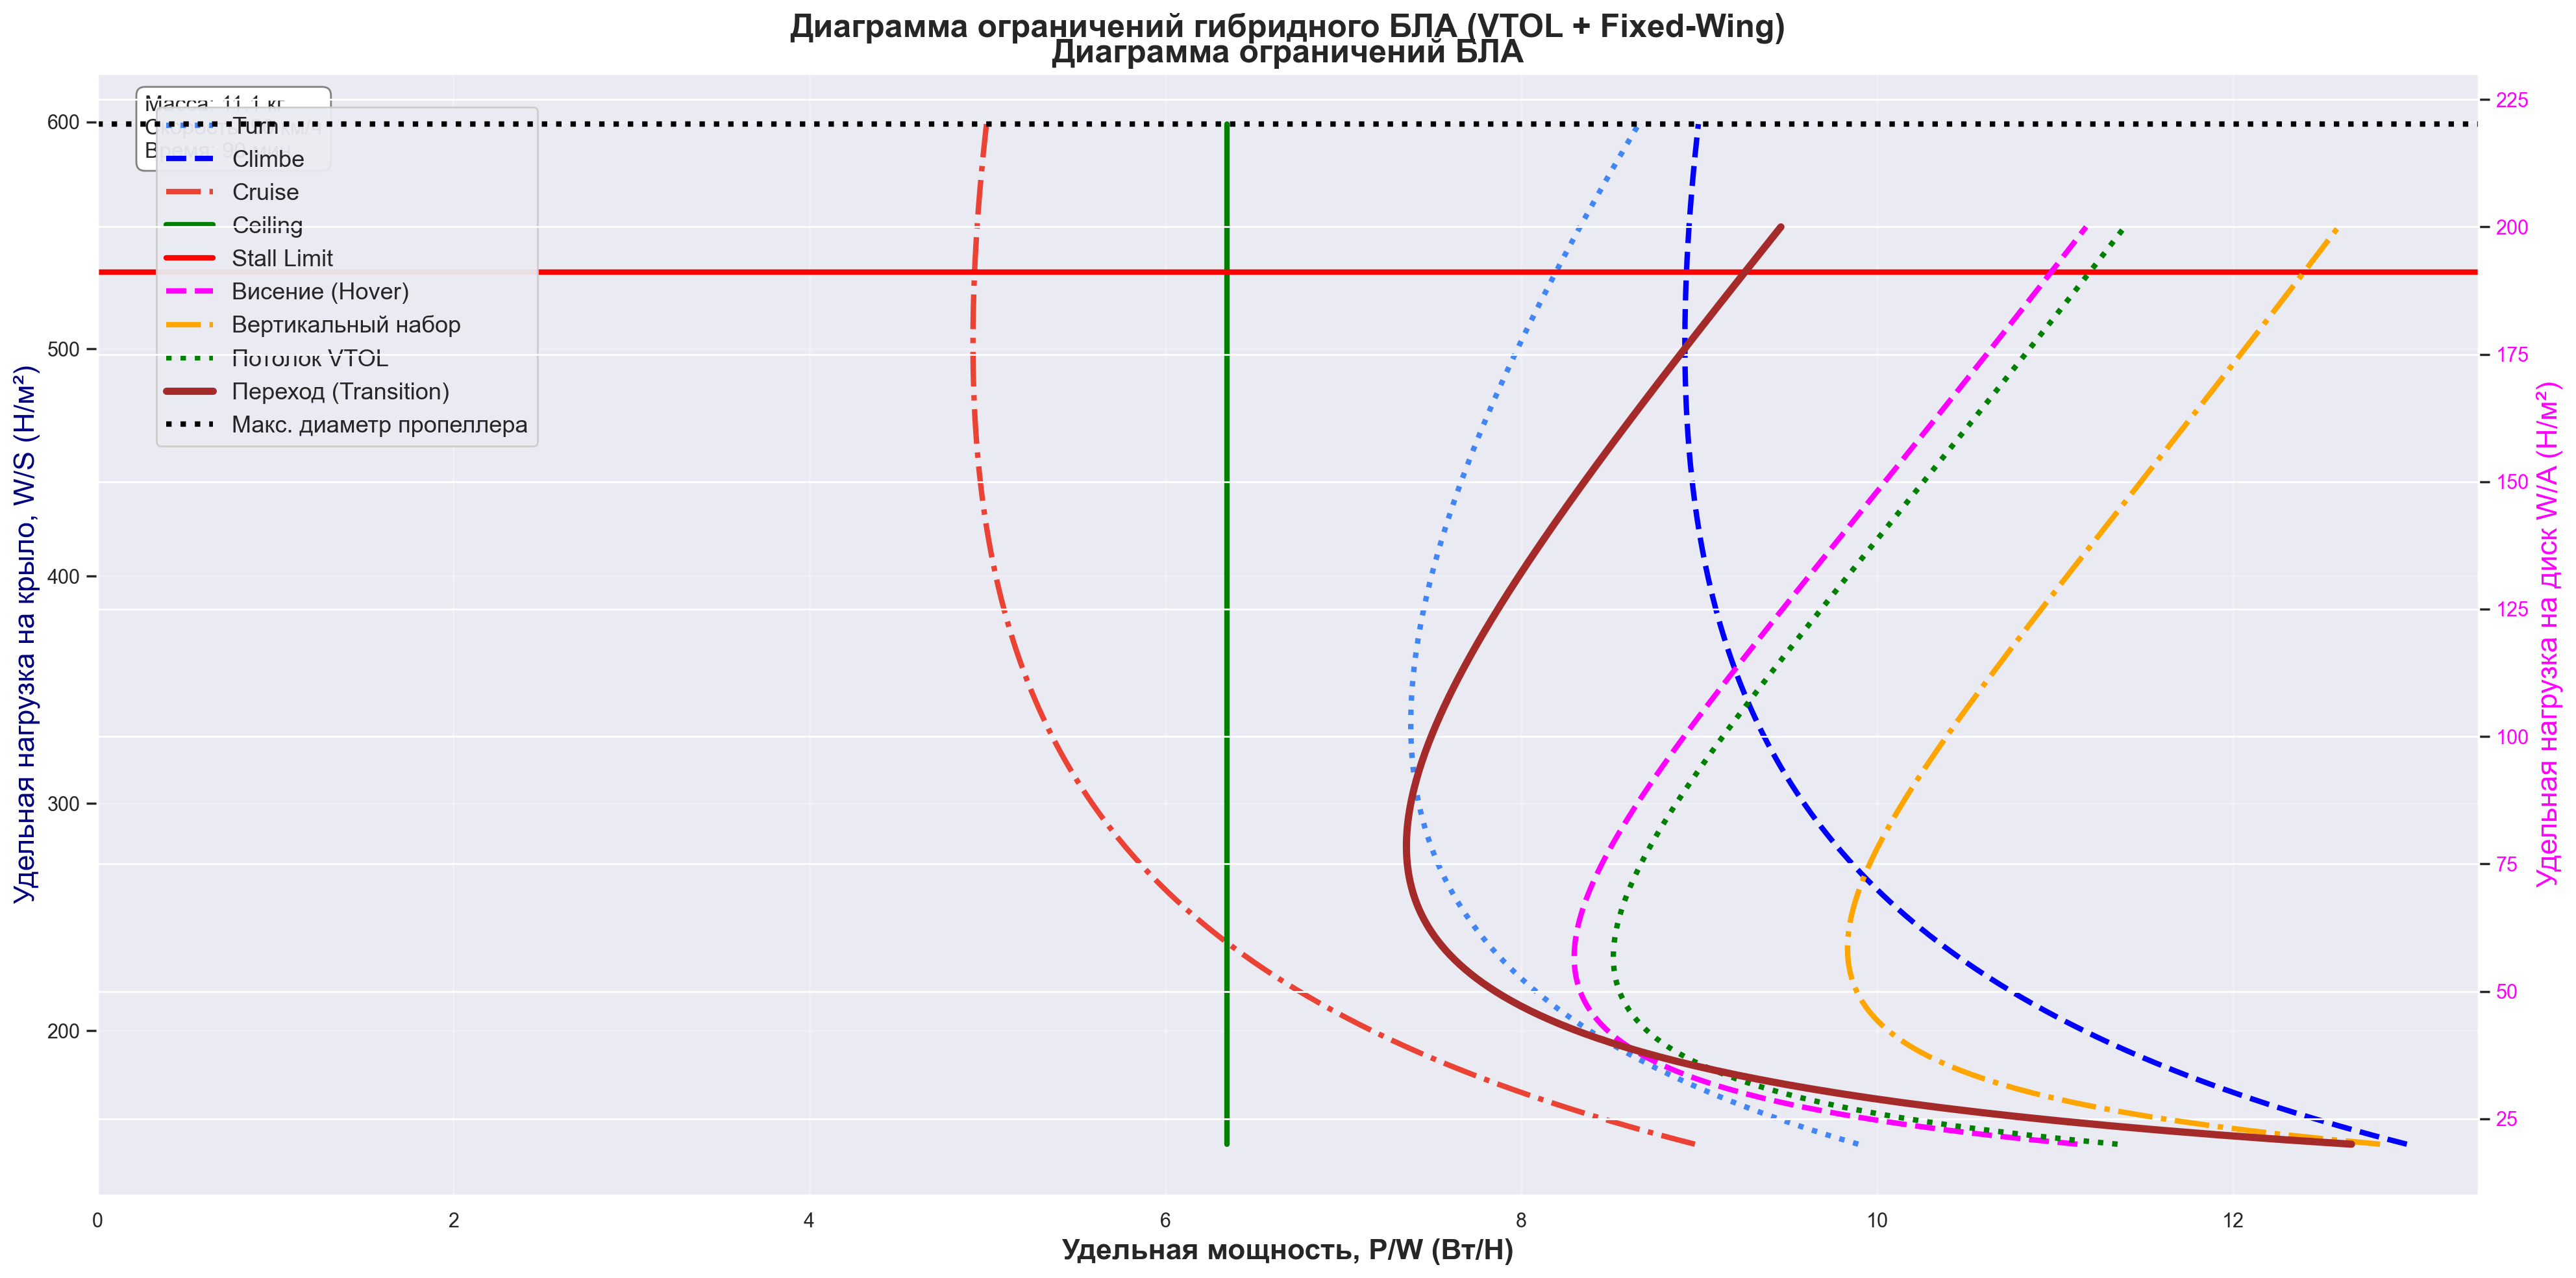

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Take-off weight base on mass from second approximation
weight_takeoff = m0_new2 * g

# Speed on transition
Vinf = stall_speed_ms
Vy_hover = 0.0
Vy_climb = 3.0
Vy_ceiling = 0.5

# Prop characteristics
Vtip = 80  # м/с
solidity = 0.1
Cd_blade = 0.02
induced_power_factor_hover = 1.15
induced_power_factor_climb = 1.15
# disc_loading_max_diameter = 0.246
total_disc_area_max = 0.2463 * 2

# Angels
teta_tilt_90 = np.pi / 2
alpha_rotor_trans = 0
V_tip_transition_helical = np.sqrt(Vtip**2 + Vinf**2)
mu = Vinf * np.cos(alpha_rotor_trans) / V_tip_transition_helical

# Wing aerodynamic
wing_loading_optimum_airborne = 300  # Н/м²

climbe_rate = 3 # m/s
ceiling_rate_of_climb = 0.5 # m/s
max_lift_coefficient = 1.4

# Wing loading on stall
wing_loading_stall = max_lift_coefficient*(air_density_sea_level*stall_speed_ms**2)/prop_efficiency
print(wing_loading_stall)

# Range of applyable wing loading in N/m^2
wing_loading_range = np.arange(150, 600, 1, dtype=float)

# Initialize arrays for storing results as floats
power_loading_turn_P_W = np.zeros_like(wing_loading_range, dtype=float)
power_loading_cruise_P_W = np.zeros_like(wing_loading_range, dtype=float)
power_loading_climb_P_W = np.zeros_like(wing_loading_range, dtype=float)
power_loading_ceiling_P_W = np.zeros_like(wing_loading_range, dtype=float)

q = 0.5 * air_density_cruise * cruise_speed_ms**2
n_load = 1.5 # Overload on wing

disc_loading_max_diameter = weight_takeoff / total_disc_area_max

# Horizontal mode calculation
# Power loading on cruise speed and altitude 
def pw_cruise(wl): 
    return (cruise_speed_ms / prop_efficiency) * (q * zero_lift_drag_cruise / wl + induced_drag_factor_K * wl / q)

# Power loading on velcoity turn
def pw_turn(wl): 
    return (cruise_speed_ms / prop_efficiency) * (q * zero_lift_drag_cruise / wl + induced_drag_factor_K * n_load**2 * wl / q)

# Power loading on climb
def pw_climb(wl): 
    return (3.0 / prop_efficiency) + (cruise_speed_ms / prop_efficiency) * (q * zero_lift_drag_cruise / wl + induced_drag_factor_K * wl / q)

# Power loading on ceiling
def pw_ceiling(wl): 
    return (0.5 / prop_efficiency) + (cruise_speed_ms / prop_efficiency) * 4 * np.sqrt(induced_drag_factor_K * zero_lift_drag_cruise / 3)

# Inserting values into arrays
for i, wing_loading_dif in enumerate(wing_loading_range):
    power_loading_cruise_P_W[i] = pw_cruise(wing_loading_dif)
    power_loading_turn_P_W[i] = pw_turn(wing_loading_dif)
    power_loading_climb_P_W[i] = pw_climb(wing_loading_dif)
    power_loading_ceiling_P_W[i] = pw_ceiling(wing_loading_dif)

# Vertical mode calculation
# Power loading on hover
def pw_hover(disc_loading):
    A = weight_takeoff / disc_loading
    P_ind = induced_power_factor_hover * np.sqrt(weight_takeoff) / np.sqrt(2 * air_density_sea_level * A)
    P_prof = air_density_sea_level * A * Vtip**3 * solidity * Cd_blade / (8 * weight_takeoff)
    return P_ind + P_prof

# Power loading on climb
def pw_vertical_climb(disc_loading, Vy):
    term1 = Vy * (1 - induced_power_factor_climb / 2)
    term2 = (induced_power_factor_climb / 2) * np.sqrt(Vy**2 + 2 * disc_loading / air_density_sea_level)
    term3 = air_density_sea_level * Vtip**3 * solidity * Cd_blade / (8 * disc_loading)
    return term1 + term2 + term3

#Power loading on transition
def pw_transition(disc_loading):
    term1 = 1.2 / np.sin(teta_tilt_90) * np.sqrt(-Vinf**2 / 2 + np.sqrt((Vinf**2 / 2)**2 + (disc_loading / (2 * air_density_sea_level * np.sin(teta_tilt_90)))**2))
    term2 = (air_density_sea_level * V_tip_transition_helical**3 / disc_loading * (solidity * Cd_blade / 8 * (1 + 4.6 * mu**2)))
    term3 = (0.5 * air_density_sea_level * Vinf**3 * zero_lift_drag_cruise / wing_loading_optimum_airborne + 2 * induced_drag_factor_K * wing_loading_optimum_airborne / (air_density_sea_level * Vinf))
    return term1 + term2 + term3


disc_loading_range = np.linspace(20, 200, 200)  # Н/м²

# Inserting values for vertical mode into array
pw_hover_arr = np.array([pw_hover(dl) for dl in disc_loading_range])
pw_vclimb_arr = np.array([pw_vertical_climb(dl, Vy_climb) for dl in disc_loading_range])
pw_vceiling_arr = np.array([pw_vertical_climb(dl, Vy_ceiling) for dl in disc_loading_range])
pw_trans_arr = np.array([pw_transition(dl) for dl in disc_loading_range])

# Creating of diagram
fig, ax1 = plt.subplots(figsize=(20, 10))

# Левая ось: Wing Loading (W/S) vs P/W
ax1.plot(power_loading_turn_P_W, wing_loading_range, ':', linewidth=3, label='Turn')
ax1.plot(power_loading_climb_P_W, wing_loading_range, '--', color='blue', linewidth=3, label='Climbe')
ax1.plot(power_loading_cruise_P_W, wing_loading_range, '-.', linewidth=3, label='Cruise')
ax1.plot(power_loading_ceiling_P_W, wing_loading_range, '-', color='green', linewidth=3, label='Ceiling')

ax1.axhline(y=wing_loading_stall, color='red', linewidth=3, label='Stall Limit')

ax1.set_xlabel('Удельная мощность, P/W (Вт/Н)', fontsize=16, fontweight='bold')
ax1.set_ylabel('Удельная нагрузка на крыло, W/S (Н/м²)', fontsize=16, color='navy')
ax1.set_title('Диаграмма ограничений БЛА', fontsize=18, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(left=0)  # Убираем отрицательные значения
# ax1.set_ylim(150, 600)

# ax1.legend(fontsize=14, loc='upper left', frameon=True, fancybox=True, shadow=True)

# plt.tight_layout()
# plt.show()

ax2 = ax1.twinx()

ax2.plot(pw_hover_arr, disc_loading_range, '--', color='magenta', lw=3, label='Висение (Hover)')
ax2.plot(pw_vclimb_arr, disc_loading_range, '-.', color='orange', lw=3, label='Вертикальный набор')
ax2.plot(pw_vceiling_arr, disc_loading_range, ':', color='green', lw=3, label='Потолок VTOL')
ax2.plot(pw_trans_arr, disc_loading_range, '-', color='brown', lw=4, label='Переход (Transition)')

# Геометрическое ограничение
ax2.axhline(y=disc_loading_max_diameter, color='black', linestyle=':', lw=3, label='Макс. диаметр пропеллера')

ax2.set_ylabel('Удельная нагрузка на диск W/A (Н/м²)', fontsize=16, color='magenta')
ax2.tick_params(axis='y', labelcolor='magenta')

# === ЛЕГЕНДА ===
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, 
           loc='upper left', bbox_to_anchor=(0.02, 0.98), fontsize=13, framealpha=0.95)

# === АННОТАЦИИ ===
ax1.text(0.02, 0.98, f"Масса: {m0_new2:.1f} кг\nСкорость: {cruise_speed} км/ч\nВремя: {flight_time} мин",
         transform=ax1.transAxes, fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.4", facecolor="white", edgecolor="gray"))

plt.title('Диаграмма ограничений гибридного БЛА (VTOL + Fixed-Wing)', 
          fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Step 4: Wing profile

In [56]:
number_point_on_chord = 30
phi = math.radians(90 / (number_point_on_chord - 1))
profile_thickness = 0.12
profile_curv = 0.04
max_curv_point = 0.4
zero_lift_angel = -90 * profile_curv

# max_lift_coefficient - maximum lift coefficient by statistic for this UAV class
profile_max_lift_coefficient = 1.55
critical_attack_angel_profile = zero_lift_angel + profile_max_lift_coefficient / (2*np.pi) * 57.3 + 2
print(critical_attack_angel_profile)

# Functions for wing profile calculation
def phi_profile_angel(n):
    return phi * (n - 1)

def x_profile(n):
    return 1 - np.cos((n-1)*phi)

def ytx_profile(x):
    return 5 * profile_thickness * (0.2969 * x ** 0.5 - 0.126 * x - 0.3516 * x ** 2 + 0.2843 * x ** 3 - 0.1015 * x ** 4)

def ycx_profile(x):
    if x <= max_curv_point:
        res = profile_curv * (2 * max_curv_point - n) * n / (max_curv_point ** 2)
    else:
        res = profile_curv * ((1 - 2 * max_curv_point) + 2 * max_curv_point * x - x ** 2) / (1 - max_curv_point) ** 2
    return res

def yc1t_profile(x):
    if x <= max_curv_point:
        res = 2 * profile_curv / max_curv_point * (1 - x / max_curv_point)
    else:
        res = 2 * profile_curv * (max_curv_point - x) / (1 - max_curv_point) ** 2
    return res

def theta(y1):
    return np.arctan(y1)

def x_upper_profile(x, ytx, θ):
    return x - ytx * np.sin(θ)

def x_lower_profile(x, ytx, θ):
    return x + ytx * np.cos(θ)

def y_upper_profile(ycx, ytx, θ):
    return ycx + ytx  * np.cos(θ)

def y_lower_profile(ycx, ytx, θ):
    return ycx - ytx * np.cos(θ)

# Creating range for arrays
n_points = range(1, number_point_on_chord + 1)

# Creating and filling arrays
phi_profile_angel_arr = np.array([phi_profile_angel(n) for n in n_points])
x_profile_arr = np.array([x_profile(n) for n in n_points])
# ytx_profile_arr = np.array([ytx_profile(x_profile_arr[i]) for i in range(len(n_points))])
ytx_profile_arr = np.array([ytx_profile(x) for x in x_profile_arr])
ycx_profile_arr = np.array([ycx_profile(x) for x in x_profile_arr])
yc1t_profile_arr = np.array([yc1t_profile(x) for x in x_profile_arr])
theta_arr = np.array([theta(yc1t) for yc1t in yc1t_profile_arr])

x_upper_profile_arr = np.array([x_upper_profile(x_profile_arr[i], ytx_profile_arr[i], theta_arr[i]) for i in range(len(n_points))])
x_lower_profile_arr = np.array([x_lower_profile(x_profile_arr[i], ytx_profile_arr[i], theta_arr[i]) for i in range(len(n_points))])
y_upper_profile_arr = np.array([y_upper_profile(ycx_profile_arr[i], ytx_profile_arr[i], theta_arr[i]) for i in range(len(n_points))])
y_lower_profile_arr = np.array([y_lower_profile(ycx_profile_arr[i], ytx_profile_arr[i], theta_arr[i]) for i in range(len(n_points))])

data = {
    'n': n_points,
    'φ': phi_profile_angel_arr,
    'x': x_profile_arr,
    'yt(x)': ytx_profile_arr,
    'yc(x)': ycx_profile_arr,
    'yc\'(x)': yc1t_profile_arr,
    'θ': theta_arr,
    'x_upper': x_upper_profile_arr,
    'x_lower': x_lower_profile_arr,
    'y_upper': y_upper_profile_arr,
    'y_lower': y_lower_profile_arr
}

df = pd.DataFrame(data)

# Форматирование вывода
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Таблица параметров аэродинамического профиля:")
print("=" * 100)
print(df.round(6))
print("\n")

# Альтернативный вывод в стиле вашего файла
print("Форматированная таблица:")
print("n\tx\t\tyt(x)\t\tyc(x)\t\tyc'(x)\t\tθ\t\tx_upper\t\ty_upper\t\tx_lower\t\ty_lower")
print("-" * 120)
for i in range(len(n_points)):
    print(f"{n_points[i]}\t{x_profile_arr[i]:.6f}\t{ytx_profile_arr[i]:.6f}\t{ycx_profile_arr[i]:.6f}\t"
          f"{yc1t_profile_arr[i]:.6f}\t{theta_arr[i]:.6f}\t{x_upper_profile_arr[i]:.6f}\t"
          f"{y_upper_profile_arr[i]:.6f}\t{x_lower_profile_arr[i]:.6f}\t{y_lower_profile_arr[i]:.6f}")

12.535346270706686
Таблица параметров аэродинамического профиля:
     n         φ         x     yt(x)     yc(x)    yc'(x)         θ   x_upper  \
0    1  0.000000  0.000000  0.000000 -0.862500  0.200000  0.197396  0.000000   
1    2  0.054165  0.001467  0.006711 -0.862500  0.199267  0.196690  0.000155   
2    3  0.108331  0.005862  0.013189 -0.862500  0.197069  0.194576  0.003312   
3    4  0.162496  0.013173  0.019414 -0.862500  0.193413  0.191054  0.009487   
4    5  0.216662  0.023379  0.025358 -0.862500  0.188310  0.186131  0.018687   
5    6  0.270827  0.036450  0.030983 -0.862500  0.181775  0.179812  0.030909   
6    7  0.324992  0.052347  0.036246 -0.862500  0.173827  0.172107  0.046139   
7    8  0.379158  0.071023  0.041101 -0.862500  0.164488  0.163028  0.064352   
8    9  0.433323  0.092425  0.045498 -0.862500  0.153788  0.152592  0.085509   
9   10  0.487489  0.116488  0.049389 -0.862500  0.141756  0.140818  0.109556   
10  11  0.541654  0.143143  0.052728 -0.862500  0.12842

# Step 5: Wing characteristics

Calculation of unmanned aerial vehicle wing characteristics. Finding MAC.

Таблица поляры крыла:
 Коэффициент подъёмной силы  Коэффициент лобового сопротивления
              -8.000000e-01                            0.135664
              -7.900000e-01                            0.134946
              -7.800000e-01                            0.134237
              -7.700000e-01                            0.133537
              -7.600000e-01                            0.132846
              -7.500000e-01                            0.132164
              -7.400000e-01                            0.131491
              -7.300000e-01                            0.130827
              -7.200000e-01                            0.130172
              -7.100000e-01                            0.129526
              -7.000000e-01                            0.128890
              -6.900000e-01                            0.128262
              -6.800000e-01                            0.127643
              -6.700000e-01                            0.127033
              -6.6

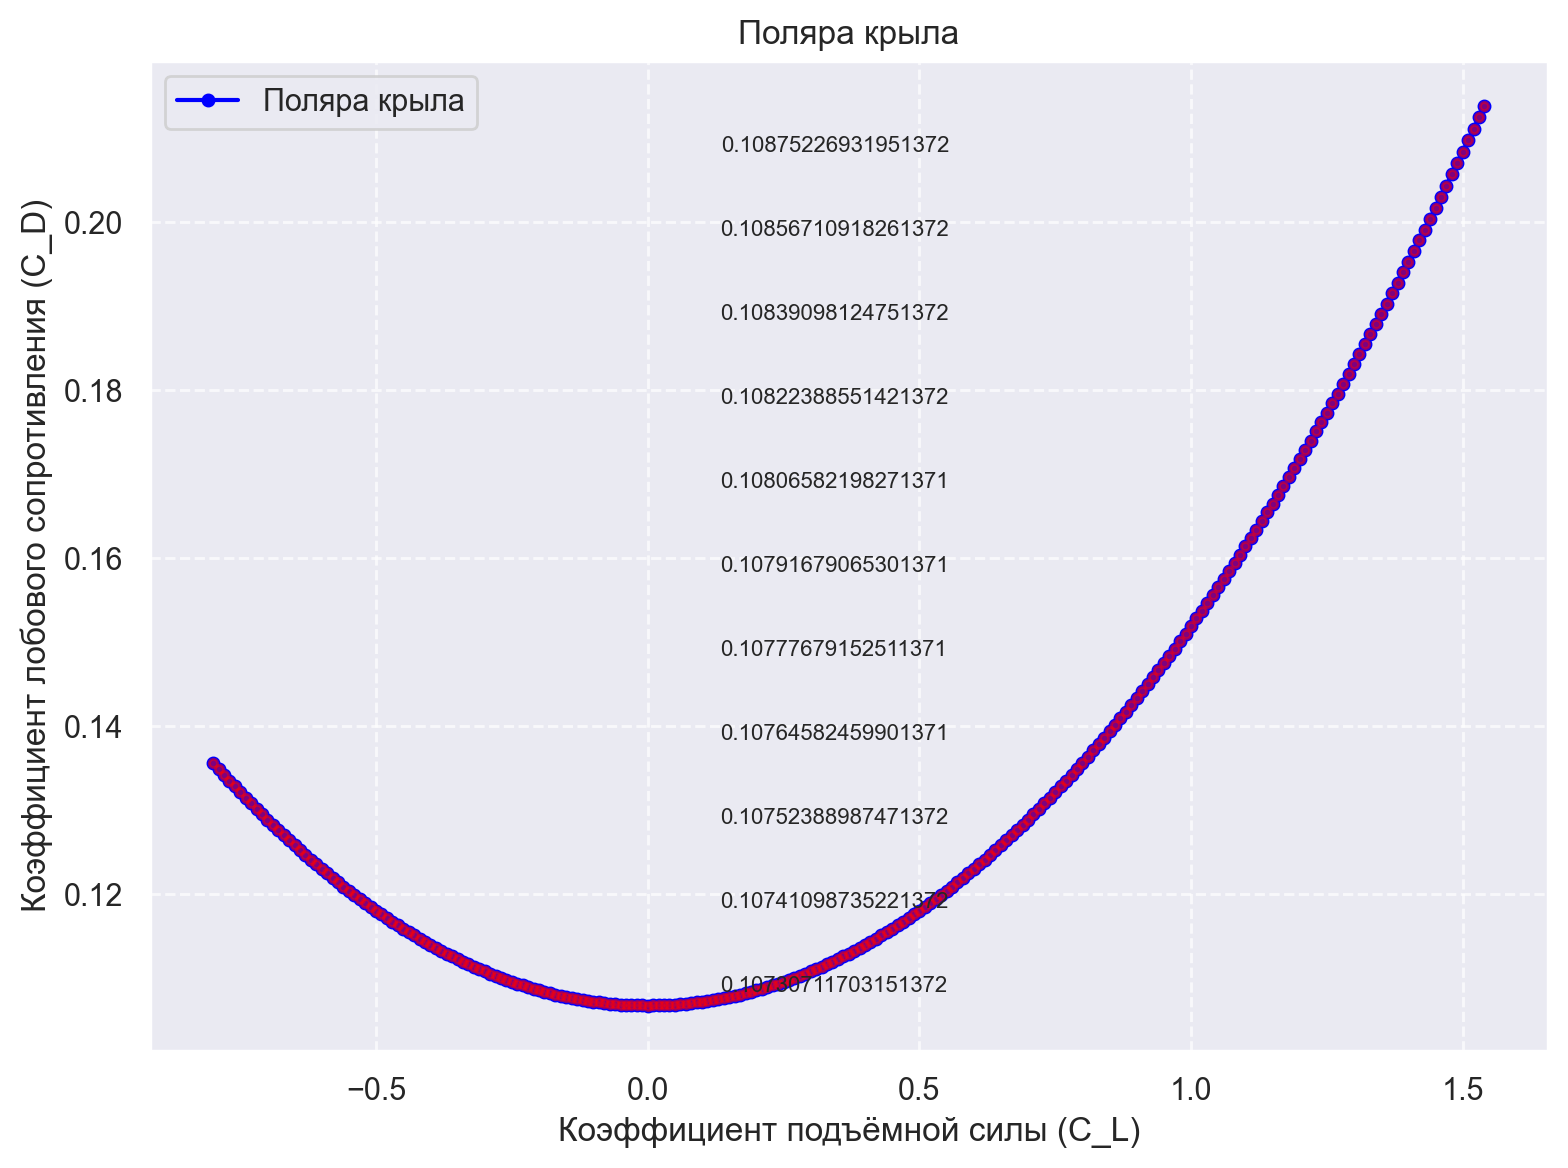

In [57]:
wing_narrowing = 0.5
sweep_angel_1_2 = 0
angel_of_incedence = 0
dihedral_angel = 0
wing_tip_twist = 0
root_sweep_angel = 90 - np.arctan(wingspan / (root_chord_lenght - tip_chord_lenght))
x_coor_root_MAC = wingspan / 6 * (2 * wing_narrowing + 1) / (wing_narrowing + 1)
y_coor_root_MAC = root_sweep_angel*np.arctan(x_coor_root_MAC)

zero_lift_angel_of_attack = zero_lift_angel + angel_of_incedence
kl = -0.0125 * (1 / wing_narrowing) ** 2 + 0.0675 * (1 / wing_narrowing) + 0.8475
max_lift_coefficient_wing = 0.5 * kl * (1 + np.cos(np.radians(wing_tip_twist))) * profile_max_lift_coefficient
derivative_lift_coefficient_wing = 2 * np.pi * AR * np.cos(np.radians(wing_tip_twist)) / (2 + AR)
critical_attack_angel_wing = zero_lift_angel_of_attack + max_lift_coefficient_wing / derivative_lift_coefficient_wing * 57.3

over_lift_angel = 1.15 * critical_attack_angel_wing
over_lift_coefficient_wing = (over_lift_angel + zero_lift_angel_of_attack) * derivative_lift_coefficient_wing / 57.3

# Plotting the wing polar graph
drag_coefficient_constant = 0.045161009
wing_lift_coefficient_array = np.arange(-0.8, max_lift_coefficient_wing + 0.1, 0.01)

def wing_drag_coefficient(CL):
    return zero_lift_drag_cruise + CL ** 2 * drag_coefficient_constant

wing_drag_coefficient_array = wing_drag_coefficient(wing_lift_coefficient_array)

data = {
    "Коэффициент подъёмной силы": wing_lift_coefficient_array,
    "Коэффициент лобового сопротивления": wing_drag_coefficient_array
}
df = pd.DataFrame(data)

# === ШАГ 7: Выводим таблицу ===
print("Таблица поляры крыла:")
print(df.to_string(index=False))

# === ШАГ 8: Строим график ===
plt.figure(figsize=(8, 6))
plt.plot(wing_lift_coefficient_array, wing_drag_coefficient_array, 'b-o', label='Поляра крыла', markersize=4)
plt.plot(wing_lift_coefficient_array, wing_drag_coefficient_array, 'ro', alpha=0.5, markersize=3)  # точки из таблицы

plt.ylabel('Коэффициент лобового сопротивления (C_D)')
plt.xlabel('Коэффициент подъёмной силы (C_L)')
plt.title('Поляра крыла')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Добавляем аннотации для ключевых точек (опционально)
for cl, cd in zip(wing_lift_coefficient_array, wing_drag_coefficient_array):
    if cl >= 0:  # только положительные C_L
        plt.annotate(f'{cd}', (cd, cl), textcoords="offset points", xytext=(5,-5), ha='left', fontsize=8)

plt.tight_layout()
plt.show()

# Vertical Stabilisator calculation

In [58]:
vertical_stab_aspect_ratio = 2

vertical_static_stab_moment = 0.001 * wingspan + 0.03
vertical_shoulder_stab = -0.002 * wingspan + 0.3
vertical_relative_stab_area = vertical_static_stab_moment / vertical_shoulder_stab
vertical_stab_area = vertical_relative_stab_area * S_wing
vertical_stab_span = (vertical_stab_area * vertical_stab_aspect_ratio) ** (1/2)

# Распределение площади (можно менять по желанию)
fraction_central = 0.40   # 40% общей площади — центральный киль вверх
fraction_side    = (1 - fraction_central) / 2   # по 30% на каждый боковой киль вниз

S_vt_central = vertical_stab_area * fraction_central
S_vt_side    = vertical_stab_area * fraction_side

# Геометрические параметры килей (примерные, будут масштабироваться)
# Центральный киль (вверх)
central_root_chord = 0.50
central_tip_chord  = 0.25
central_span       = 0.80   # высота киля

central_area_check = (central_root_chord + central_tip_chord)/2 * central_span
scale_central = np.sqrt(S_vt_central / central_area_check)

# Боковые кили (вниз)
side_root_chord = 0.40
side_tip_chord  = 0.20
side_span       = 0.60

side_area_check = (side_root_chord + side_tip_chord)/2 * side_span
scale_side = np.sqrt(S_vt_side / side_area_check)

# Drawing of UAV
In this section I will create and draw geometry of UAV  

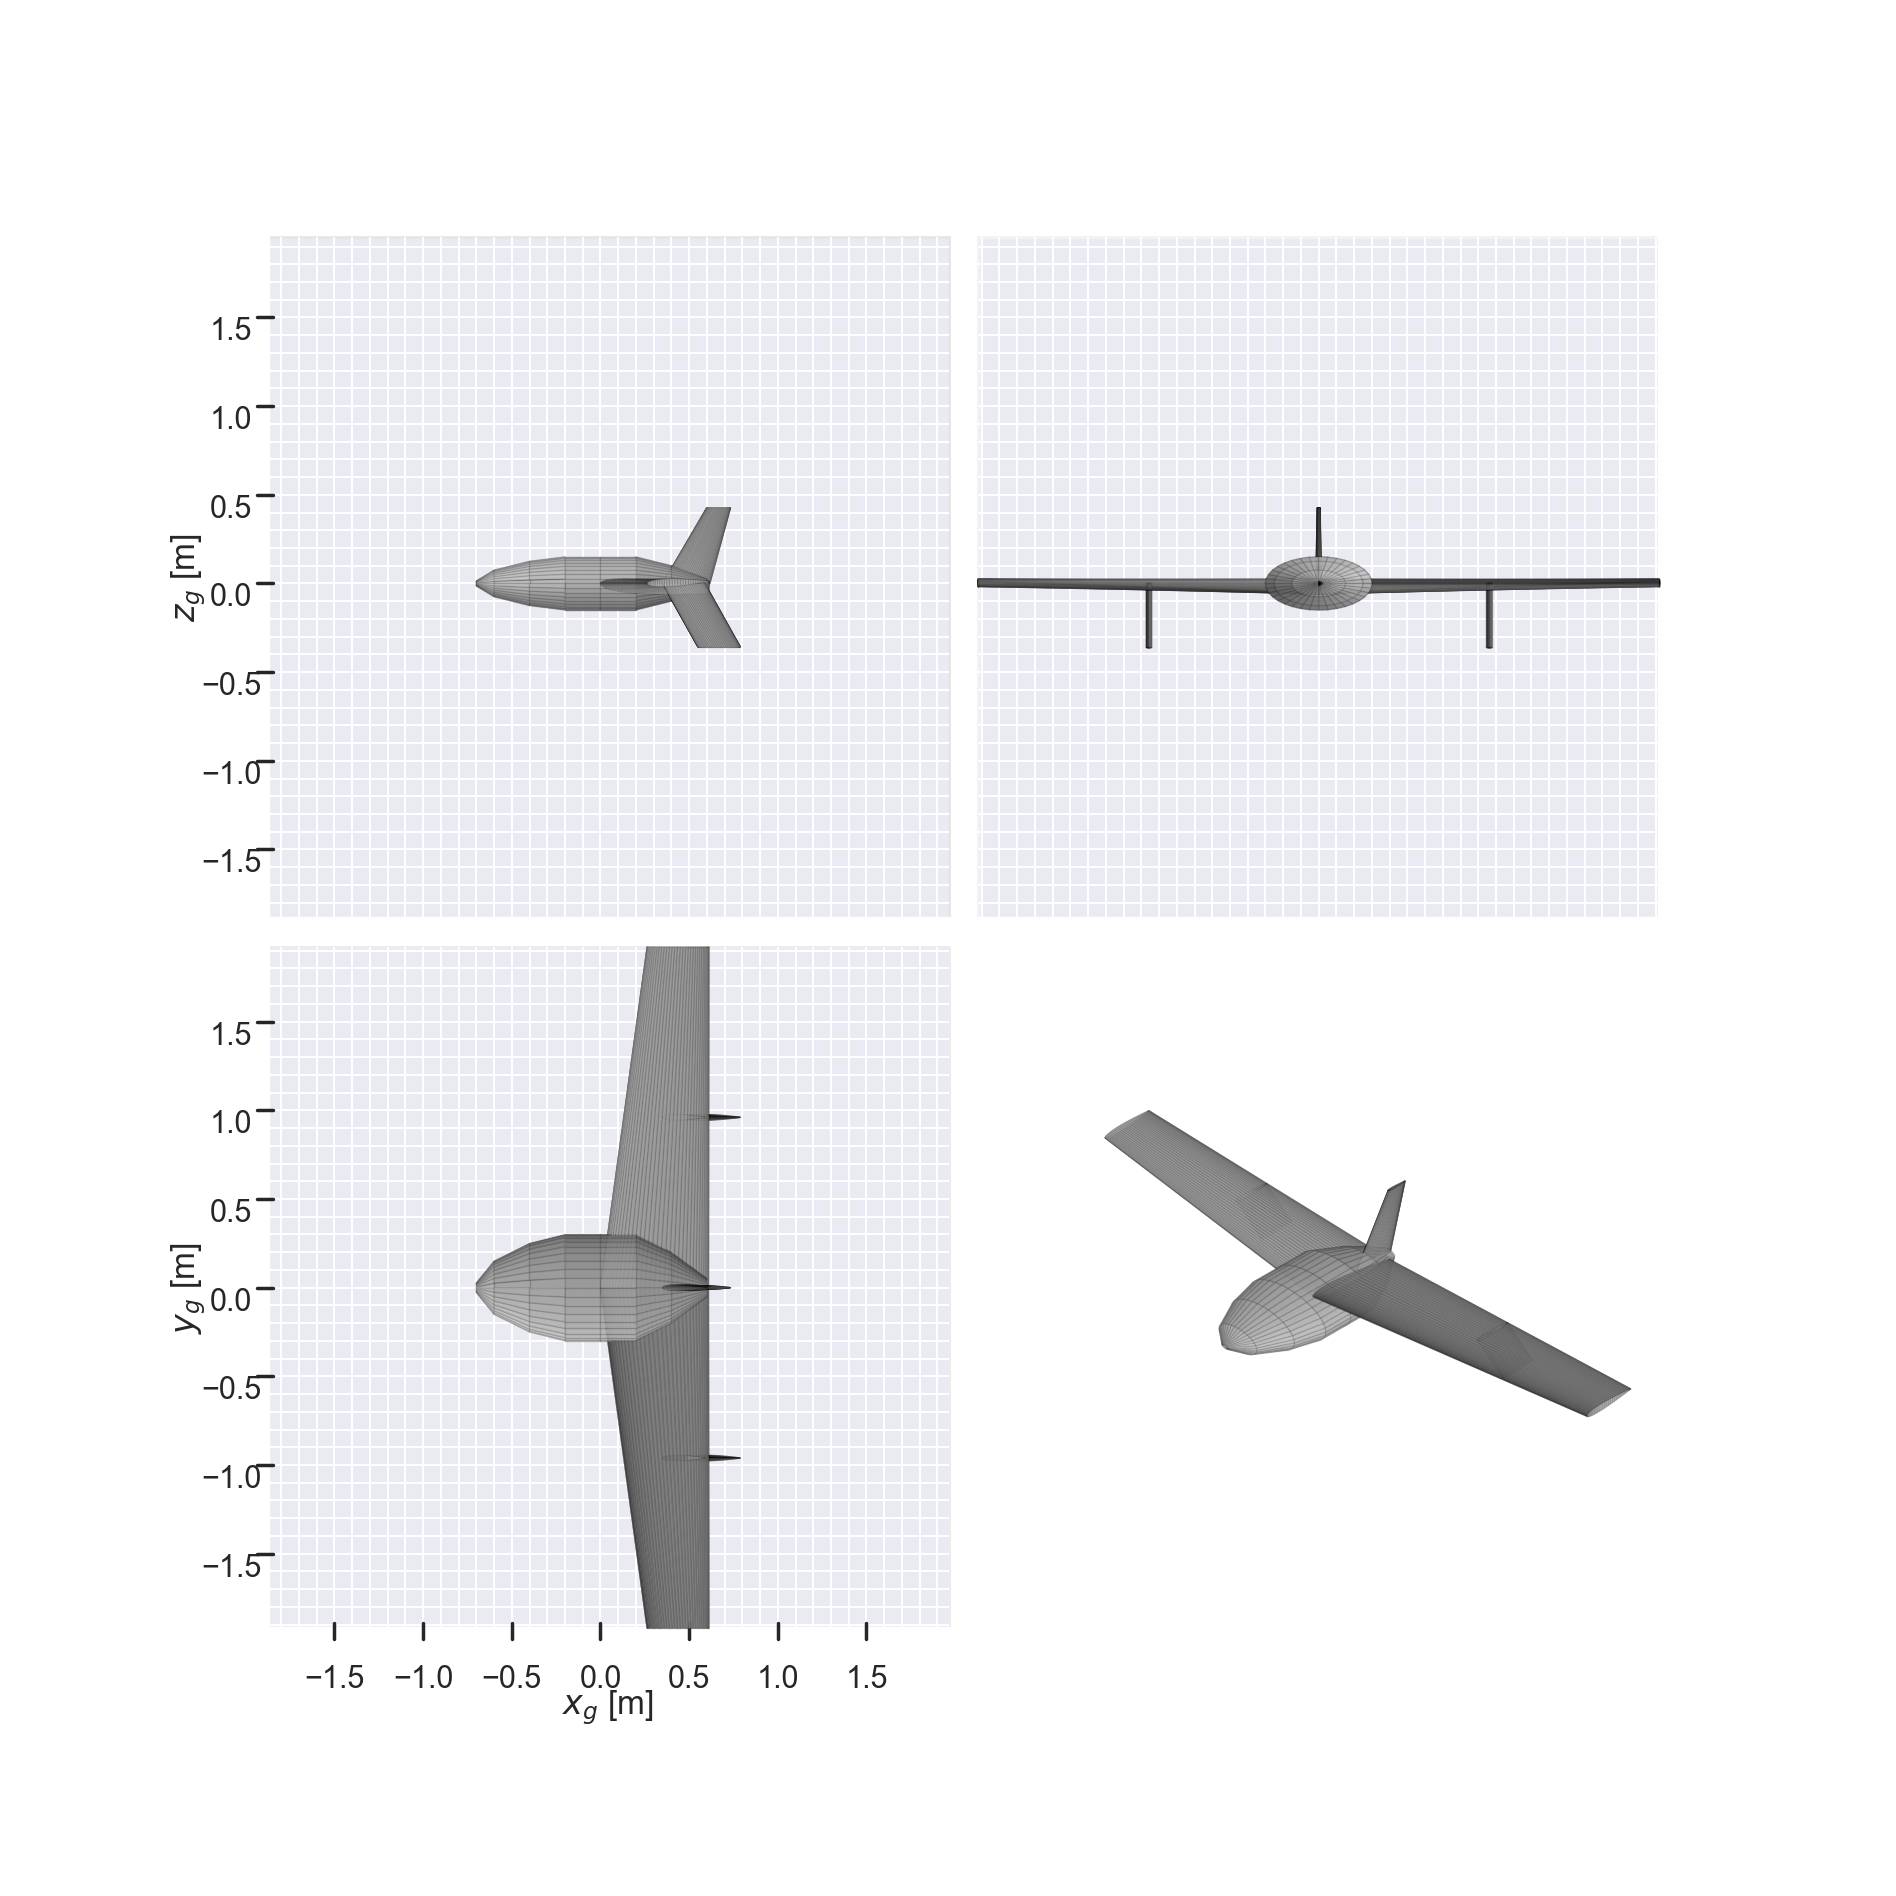

array([[<Axes3D: zlabel='$z_g$ [m]'>, <Axes3D: >],
       [<Axes3D: xlabel='$x_g$ [m]', ylabel='$y_g$ [m]'>, <Axes3D: >]],
      dtype=object)

In [60]:
import aerosandbox as asb
import aerosandbox.numpy as np

airplane = asb.Airplane(
    name="Flying Wing UAV with Triple Fins",
    xyz_ref=[root_chord_lenght * 0.25, 0, 0],
    s_ref=S_wing,
    c_ref=MAC,
    b_ref=AR,
    wings=[
        asb.Wing(
            name="Main Wing",
            symmetric=True,
            xsecs=[
                # Корневая секция
                asb.WingXSec(
                    xyz_le=[0, 0, 0],
                    chord=root_chord_lenght,
                    twist=5,
                    airfoil=asb.Airfoil("naca0012"),
                    control_surface_is_symmetric=False,
                    control_surface_deflection=0,
                ),
                # Концевая секция
                asb.WingXSec(
                    xyz_le=[root_chord_lenght - tip_chord_lenght, wingspan/2, 0],
                    chord=tip_chord_lenght,
                    twist=-2,
                    airfoil=asb.Airfoil("naca0012"),
                ),
            ],
        ),
        # Центральный вертикальный стабилизатор (вверх)
        asb.Wing(
            name="Central Fin Up",
            symmetric=False,
            xsecs=[
                asb.WingXSec(
                    xyz_le=[0.35, 0, 0],  # Начинается от фюзеляжа
                    chord=central_root_chord * scale_central,
                    twist=0,
                    airfoil=asb.Airfoil("naca0012"),
                ),
                asb.WingXSec(
                    xyz_le=[0.35 + 0.25, 0, central_span * scale_central],  # Направлен вверх
                    chord=central_tip_chord * scale_central,
                    twist=0,
                    airfoil=asb.Airfoil("naca0012"),
                ),
            ],
        ),
        # Левый вертикальный стабилизатор (вниз)
        asb.Wing(
            name="Left Fin Down",
            symmetric=False,
            xsecs=[
                asb.WingXSec(
                    xyz_le=[0.35, wingspan/4, 0],  # По центру левой консоли
                    chord=side_root_chord * scale_side,
                    twist=0,
                    airfoil=asb.Airfoil("naca0012"),
                ),
                asb.WingXSec(
                    xyz_le=[0.35 + 0.20, wingspan/4, -side_span * scale_side],  # Направлен вниз
                    chord=side_root_chord * scale_side,
                    twist=0,
                    airfoil=asb.Airfoil("naca0012"),
                ),
            ],
        ),
        # Правый вертикальный стабилизатор (вниз)
        asb.Wing(
            name="Right Fin Down",
            symmetric=False,
            xsecs=[
                asb.WingXSec(
                    xyz_le=[0.35, -wingspan/4, 0],  # По центру правой консоли
                    chord=side_root_chord * scale_side,
                    twist=0,
                    airfoil=asb.Airfoil("naca0012"),
                ),
                asb.WingXSec(
                    xyz_le=[0.35 + 0.20, -wingspan/4, -side_span * scale_side],  # Направлен вниз
                    chord=side_root_chord * scale_side,
                    twist=0,
                    airfoil=asb.Airfoil("naca0012"),
                ),
            ],
        ),
    ],
    fuselages=[
        asb.Fuselage(
            name="Oval Body with Nose Cone",
            xsecs=[
                # Носовая часть - начинается с нулевого сечения и плавно увеличивается
                asb.FuselageXSec(
                    xyz_c=[-0.7, 0, 0],  # Носовая точка (x = -0.3)
                    width=0.05,  # Очень маленькое сечение в носу
                    height=0.025,
                ),
                # Плавное увеличение к основной части фюзеляжа
                asb.FuselageXSec(
                    xyz_c=[-0.6, 0, 0],
                    width=0.3,
                    height=0.15,
                ),
                asb.FuselageXSec(
                    xyz_c=[-0.4, 0, 0],  # Начало крыла
                    width=0.5,
                    height=0.25,
                ),
                # Основная цилиндрическая часть
                asb.FuselageXSec(
                    xyz_c=[-0.2, 0, 0],
                    width=0.6,
                    height=0.3,
                ),
                asb.FuselageXSec(
                    xyz_c=[0.0, 0, 0],
                    width=0.6,
                    height=0.3,
                ),
                asb.FuselageXSec(
                    xyz_c=[0.2, 0, 0],
                    width=0.6,
                    height=0.3,
                ),
                # Хвостовая часть - плавное сужение
                asb.FuselageXSec(
                    xyz_c=[0.4, 0, 0],
                    width=0.4,
                    height=0.2,
                ),
                asb.FuselageXSec(
                    xyz_c=[0.6, 0, 0],  # Конечная точка фюзеляжа (x = 1.0)
                    width=0.1,
                    height=0.05,
                ),
            ],
        )
    ],
)

airplane.draw_three_view()